# Fandango Movie Ratings

In this project, we will review more recent Fandango ratings to see if there has been any change in the ratings after it was determined that Fandango's ratings were rounded up, skewing the distribution of ratings.  Are the ratings displayed still higher, or has this been corrected?

## The Data

We will have two sets of data to work with - one set collected in 2015 to perform the original analysis that the ratings were inflated, and one set collected for movied released in 2016 and 2017.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
before = pd.read_csv('fandango_score_comparison.csv')
before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
after = pd.read_csv('movie_ratings_16_17.csv')
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


Isolate the columns of interest for this analysis and make copies.

In [4]:
fandango_before = before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 
                          'Fandango_votes', 'Fandango_Difference']].copy()
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [5]:
fandango_after = after[['movie', 'year', 'fandango']].copy()
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


To perform the analysis we would like, ideally we would have two samples of the Fandango ratings, one before the change and one after, that covered the same movies.  Then we could use that data to determine if there was a change in how the ratings were reported.

Unfortunately, the `before` dataset is for movies that were selling tickets in 2015 while the `after` dataset is for movies that were released in 2016 and 2017.  Both of these datasets also looked for a minimum number of ratings to be included in the data, so not every movie had a chance of being included in the datasets.

This is not exactly the data we would like to have to be able to answer our initial question.  We have two choices - collect new data to be consistent with our original question or we change the goal of our original analysis.

In this case, we will change the goal:
- Is there a difference in ratings for popular movies in 2015 from those in 2016?
- This should still serve as a good proxy for our initial question, and we can answer this with the data we have available.

We will need to define what "popular" means in this context.  For the 2015 data, the movies had to have at least 30 ratings to be included.  We don't have information on the number of ratings for the `after` dataset.

In [6]:
fandango_after.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


From the Fandango website, below are the number of ratings for each of the movies shown above, as of November 20, 2018:

| Movie | Number of Ratings |
| --- | --- |
| Mechanic: Resurrection | 2,249 |
| Warcraft | 7,278 |
| Max Steel | 493 |
| Me Before You | 5,268 |
| Fantastic Beasts and Where to Find Them | 13,472 |
| Cell | 18 |
| Genius | 127 |
| Sully | 11,886 |
| A Hologram for the King | 501 |
| Captain America: Civil War | 35,126 |

All but one of these had at least 30 ratings, which looks pretty good.

In [7]:
# check number of ratings from before data
sum(fandango_before['Fandango_votes'] < 30)

0

Next let's restrict the data to the two years of interest - 2015 for the before sample and 2016 for the after sample.  For the before sample, we will need to get the year from the movie name.

In [8]:
# from the movie name, take the last 4 characters and exclude the last parens
fandango_before['Year'] = fandango_before['FILM'].str[-5:-1]
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [9]:
# check on which year(s) are included in the before data
fandango_before['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [10]:
# going forward, only work with the 2015 movies from the before data
fandango_2015 = fandango_before[fandango_before['Year']=='2015'].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [11]:
# check on which year(s) are included in the after data
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [12]:
# going forward, only work with the 2016 movies from the after data
fandango_2016 = fandango_after[fandango_after['year']==2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Compare the Distributions

First, let's determine if the distributions of the two samples we have are different.  Let's look at the shapes of the distributions.

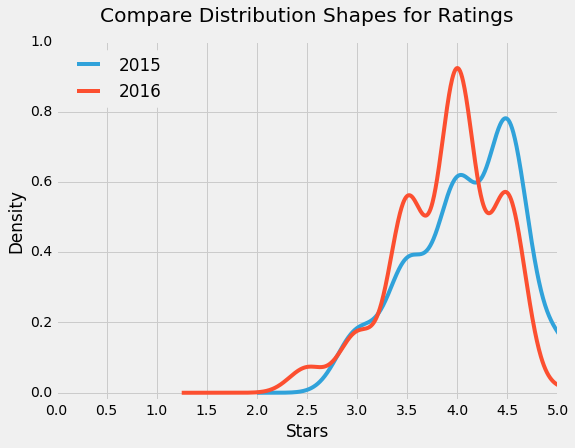

In [13]:
# compare the kernel density plots

from numpy import arange
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, 
                                         figsize = (8,6))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Compare Distribution Shapes for Ratings", y = 1.04)
plt.xlabel('Stars')
plt.xlim(0,5)
plt.ylim(-0.02,1)
plt.xticks(arange(0,5.1,.5))
plt.show()

There appears to be a difference in the shapes of these two distributions.  The distribution for 2015 is to the right of the distribution for 2016.  While both are skewed left, the 2016 distribution appears to be less skewed than the 2015 distribution.

The ratings do look to be lower in 2016 than in 2015, though the average movie rating is still relatively high (which maybe isn't surprising because this website sells movie tickets).

## Compare Relative Frequencies

Next, let's look at the frequencies distribution tables for the two years.  Since the two samples are not the same size, let's review relative frequencies, rather than absolute frequencies.

In [14]:
# 2015 relative frequencies
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [15]:
# 2016 relative frequencies
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

We can see several things from the above tables:

- The percentage of ratings of 5.0 stars dropped, from almost 7% to about 0.5%.  Similarly, ratings of 4.5 stars dropped, from about 38% to about 25%.
- In 2016, we now have some movies rated as low as 2.5 stars.  In 2015, the lowest rating was 3.0 stars.
- The shift toward lower ratings is still apparent from the tables, though it is easier to see that in the plots above, rather than in these tables.

## Review Summary Statistics

Next, let's look at the mean, median, and mode of both the 2015 and 2016 data.  Is there a discernable difference between any of these metrics?

In [16]:
# determine mean, median, and mode for each of the datasets

mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()
median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

summary_stats = pd.DataFrame()
summary_stats['2015'] = [mean_2015, median_2015, mode_2015]
summary_stats['2016'] = [mean_2016, median_2016, mode_2016]
summary_stats.index = ['mean', 'median', 'mode']
summary_stats

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


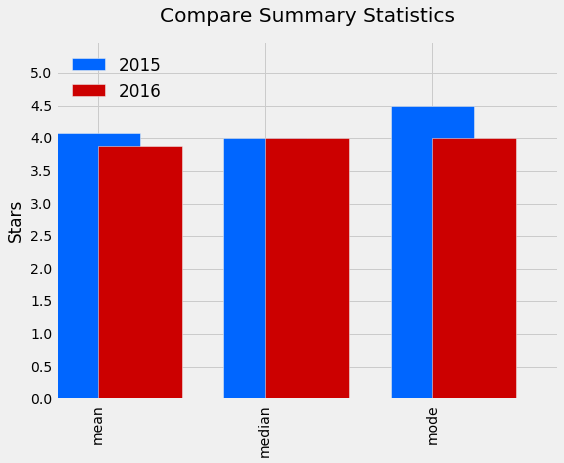

In [17]:
# create grouped bar plot of the summary statistics

plt.style.use('fivethirtyeight')

summary_stats['2015'].plot.bar(color = '#0066FF', align = 'center', 
                               label = '2015', figsize = (8,6))
summary_stats['2016'].plot.bar(color = '#CC0000', align = 'edge', 
                               label = '2016')

plt.title('Compare Summary Statistics', y = 1.04)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper left')
plt.show()

From the above, we can see that the median is 4.0 for both datasets, but the mean is slightly lower in 2016 than in 2015, and the mode drops from 4.5 stars in 2015 to 4.0 stars in 2016.  This also confirms that the popular movies in 2016 were rated lower than those in 2015.

## Conclusion

From the above, it does appear that popular movies were rated lower on the Fandango website for 2016 than for 2015.  This suggests that the inflation found in the ratings in 2015 was reduced.

We cannot say for sure whether the problem with rounding up of ratings was fixed, but this analysis does lend support to Fandango's claim of fixing the ratings displayed after the 2015 analysis was completed.